**21-03-05 python 11_N차원 배열 다루기(Numpy) (c)cherryuki (ji)**

# <font color="blue">ch11_N차원 배열 다루기</font>

# 4절. 복사와 뷰
## 4.1 모두 복사 안함(스칼라 변수만 제외)
- 스칼라 변수: 문자, 숫자, bool

In [2]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [4]:
#a와 b는 같은 넘파이 배열 객체로 이름만 다름(복사X, 할당)
b = a #같은 주소, b를 바꾸면 a도 바뀜

In [5]:
b is a

True

In [6]:
b.shape, b.ndim

((12,), 1)

In [7]:
b.shape=3,4
b.shape, b.ndim

((3, 4), 2)

In [8]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
id(a), id(b)

(2303404691904, 2303404691904)

In [10]:
def f(data):
    print(id(data))

In [11]:
f(a)

2303404691904


## 4.2 얕은 복사; 뷰(view)

In [12]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
c = a.view()
c is a

False

In [14]:
b = a
b is a

True

In [15]:
c.flags.owndata #c가 메모리를 직접 소유X

False

In [16]:
a.flags.owndata #b로 해도 True(메모리를 직접 소유O)

True

In [18]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
c.shape =(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [20]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
c[:, 2] = 999 #2,6 대신 999
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [22]:
a #2,6 대신 999(데이터는 똑같은 메모리를 씀, c는 shape만 가지고 있음)

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [23]:
a = np.arange(12).reshape(3,4)
s = a[:, 1:3] #슬라이싱 -> view 생성
print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [24]:
#s의 shape바꿔도 a에 영향X, s의 데이터 바꾸면 a데이터도 바뀜
s[:, 0] = 99 #1,5,9 대신 99
s

array([[99,  2],
       [99,  6],
       [99, 10]])

In [25]:
a

array([[ 0, 99,  2,  3],
       [ 4, 99,  6,  7],
       [ 8, 99, 10, 11]])

## 4.3 깊은 복사; copy()

In [26]:
a = np.arange(12).reshape(3,4)
d = a.copy()
print(a)
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [27]:
d is a

False

In [28]:
d.flags.owndata #d객체가 메모리를 직접 소유

True

In [29]:
d.base is a

False

In [30]:
d.shape=(2,6)
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [31]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
d[0]=99
d

array([[99, 99, 99, 99, 99, 99],
       [ 6,  7,  8,  9, 10, 11]])

In [33]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
a[0]=20
a

array([[20, 20, 20, 20],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
d

array([[99, 99, 99, 99, 99, 99],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급 인덱싱
## 5.1 인덱스 배열로 인덱싱

In [36]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [37]:
a[2]

4

In [38]:
i = np.array([1,1,3,8,5])

In [39]:
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [41]:
j = np.array([[3,4], [9,7]])

In [42]:
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

**인덱싱의 단일 배열은 첫번째 차원 참조**

In [44]:
palette = np.array([[0,0,0],      #black
                    [255,0,0],    #red
                    [0,200,0],    #green(0,255,0은 형광 초록에 가까움)
                    [0,0,255],    #blue
                    [255,255,255],#white
                    [255,255,0]]) #yellow
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 200,   0],
       [  0,   0, 255],
       [255, 255, 255],
       [255, 255,   0]])

In [45]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,5,5,5,5,0,0,4],
                        [0,0,5,5,5,5,5,5,0,0],
                        [0,5,5,1,5,5,3,5,5,0],
                        [0,5,5,1,5,5,3,5,5,0],
                        [0,5,5,5,5,5,5,5,5,0],
                        [0,5,5,2,5,5,2,5,5,0],
                        [4,0,5,5,2,2,5,5,0,4],
                        [4,4,0,5,5,5,5,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_index

array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
       [4, 0, 0, 5, 5, 5, 5, 0, 0, 4],
       [0, 0, 5, 5, 5, 5, 5, 5, 0, 0],
       [0, 5, 5, 1, 5, 5, 3, 5, 5, 0],
       [0, 5, 5, 1, 5, 5, 3, 5, 5, 0],
       [0, 5, 5, 5, 5, 5, 5, 5, 5, 0],
       [0, 5, 5, 2, 5, 5, 2, 5, 5, 0],
       [4, 0, 5, 5, 2, 2, 5, 5, 0, 4],
       [4, 4, 0, 5, 5, 5, 5, 0, 4, 4],
       [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])

In [46]:
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

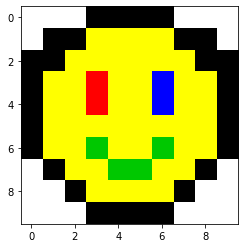

In [47]:
# %matplotlib inline 주피터 노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data, interpolation='nearest')
plt.show()

In [50]:
#손글씨 관련 - tensorflow 패키지 install
#아나콘다 프롬포트: pip install tensorflow

In [51]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [52]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()
mnist[0][0].shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

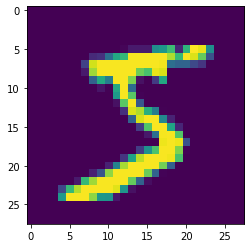

In [53]:
mnist_data = mnist[0][0]
import matplotlib.pyplot as plt
plt.imshow(mnist_data[0])

## 5.2 다차원 인덱싱

In [8]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
i = np.array([[0,1],
            [1,2]])
j = np.array([[2,1],
             [3,3]])
print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [10]:
a[i,j]   #(0,2),(1,1) i가 행 j가 열
         #(1,3),(2,3)

array([[ 2,  5],
       [ 7, 11]])

In [11]:
a[i, ...]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [12]:
a[i,]==a[i]

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [13]:
np.all(a[i,]==a[i]) #전부 다 True여야 True리턴

True

In [14]:
a[i, np.array([[2,2],[2,2]])] #0행2열, 1행2열
                              #1행2열, 2행2열

array([[ 2,  6],
       [ 6, 10]])

In [15]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

## 5.3 argmax; 최대값이 있는 곳의 인덱스 반환

In [17]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [18]:
ind = data.argmax(axis=0) #각 열에서 최대값이 있는 index 
ind

array([2, 0, 3, 1], dtype=int64)

In [19]:
data.shape[1] #열 수

4

In [20]:
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [21]:
for i, item in enumerate(data_col_max):
    print("{}번째 열 최대값은 {:.5f}".format(i, item))

0번째 열 최대값은 0.98936
1번째 열 최대값은 0.84147
2번째 열 최대값은 0.99061
3번째 열 최대값은 0.65699


In [22]:
data.max(axis=0) #각 열에서 최대값을 반환

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [23]:
np.all(data.max(axis=0)==data_col_max)

True

In [33]:
#행마다 최대값 출력하기(argmax함수 이용)
idx = data.argmax(axis=1)
idx

array([2, 3, 0, 2, 3], dtype=int64)

In [34]:
data.shape[0] #행 수

5

In [35]:
data_row_max = data[range(data.shape[0]), idx]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [36]:
for i, item in enumerate(data_row_max):
    print("{}번째 행 최대값은 {:.5f}".format(i, item))

0번째 행 최대값은 0.90930
1번째 행 최대값은 0.65699
2번째 행 최대값은 0.98936
3번째 행 최대값은 0.99061
4번째 행 최대값은 0.14988


In [37]:
data.max(axis=1) #각 행에서 최대값

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [38]:
np.all(data.max(axis=1)==data_row_max)

True

## 5.3 인덱싱을 이용한 값 변경

In [39]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [40]:
a[[1,3,4]]==0
a

array([0, 1, 2, 3, 4])

In [42]:
a = np.arange(5)
a[[0,0,2]]=[99,999,999] #동일 인덱스가 2번 이상 나오면, 마지막 것만 실행함
a

array([999,   1, 999,   3,   4])

In [43]:
a = np.arange(5)
print('변경 전:', a)
a[[0,0,2]] +=1  #동일 인덱스가 2번 이상 나오면, 마지막 것만 실행함
print('변경 후:',a)

변경 전: [0 1 2 3 4]
변경 후: [1 1 3 3 4]


## 5.4 논리 배열을 이용한 인덱싱

In [44]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [45]:
a%2==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [46]:
a[a%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [47]:
a[a%2==0] = a[a%2==0]**2
a[a%2==0]

array([  0,   4,  16,  36,  64, 100, 144, 196, 256, 324])

In [48]:
a

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

## 5.5 ix_()함수
- N개의 1차원 시퀀스 배열을 입력받아 N차원 N개를 반환

In [54]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[11, 12, 13]]))

In [55]:
ax, bx = np.ix_(a,b)

In [56]:
ax

array([[1],
       [2],
       [3],
       [4]])

In [57]:
bx

array([[11, 12, 13]])

In [58]:
ax.ndim, bx.ndim #2차원

(2, 2)

In [59]:
ax.shape, bx.shape

((4, 1), (1, 3))

In [60]:
r = np.add(ax,bx)
r

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

In [62]:
print(a[1]+b[2])
print(r[1,2])

15
15


# 6절. 선형 대수
- 2차원 넘파이 배열은 행렬
  - 행렬곱: @ 또는 np.dot()
  - 역행렬: np.linalg.inv(x)
  - 전치행렬: x.T, x.tanspose()
  - nxn 단위행렬: np.eye(n)
  - 대각합: np.trace(x)
  - 연립방정식 해 풀기: np.linalg.solve(a,b)

## 6.1 선형 연립 방정식 풀이(회귀 도출); 독립변수 2개, 데이터 2개

In [63]:
a = np.array([[1,2],
             [3,4]]) #독립변수
a

array([[1, 2],
       [3, 4]])

In [64]:
y = np.array([5,7]) #종속변수
y

array([5, 7])

**a @ x = y** <br>
**a의 역행렬 @ a @ x = a의 역행렬 @ y**<br>
**x=a의 역행렬@y**

In [65]:
#a의 역행렬 @ a 가 단위 행렬인지 확인
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [66]:
a @ np.linalg.inv(a)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [67]:
np.all(np.eye(2)@a==a)

True

In [68]:
np.all(a@np.eye(2)==a)

True

In [69]:
x = np.linalg.inv(a)@y
x

array([-3.,  4.])

In [70]:
#독립변수 2,3 일 경우 종속 변수 값은?
2 * x[0] + 3*x[1]

6.000000000000002

## 6.2 선형 연립 방정식 풀이(회귀 도출); 독립변수 1개
정방 행렬을 위해 데이터 2개

In [71]:
x = [2,3]
y = [6.8, 7.3] ##수정 A

In [72]:
# 2 1
# 3 1
A = np.column_stack((x, np.ones(len(x)))) #독립변수
A

array([[2., 1.],
       [3., 1.]])

In [73]:
Y = np.array(y).reshape(2,1) #reshape(2,1) 안해도 동일한 결과
Y

array([[6.8],
       [7.3]])

- a @ x = y
- a의 역행렬 @ a @ x = a의 역행렬 @ y
- x=a의 역행렬@y

In [74]:
X = np.linalg.inv(A) @ Y
X

array([[0.5],
       [5.8]])

In [75]:
#연립방정식 해법을 구하는 함수
np.linalg.solve(A,Y)

array([[0.5],
       [5.8]])

In [76]:
#도축된 회귀식
f = A[:,0]*X[0]+X[1]
f

array([6.8, 7.3])

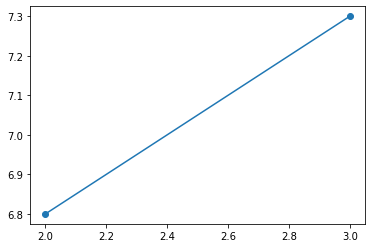

In [82]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
#plt.plot(x,y,'-')
plt.plot(A[:,0], f, '-')
plt.show()

In [83]:
#데이터를 n개
x = [32, 64, 96, 118, 216, 114, 152, 158] #독립변수
y = [18, 24, 61.5, 49, 52, 105, 130, 125] #종속변수

In [84]:
A = np.column_stack((x,np.ones(len(x))))
print(A) #독립변수 행렬
B = np.array(y).reshape(len(y), 1)
print(B) #종속변수 행렬

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [216.   1.]
 [114.   1.]
 [152.   1.]
 [158.   1.]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130. ]
 [125. ]]


**A@X = B**<br>
**(A.T@A) @ X = A.T @ B**<br>
**X = (A.T@A)의 역행렬 @ A.T @ B**

In [86]:
X = np.linalg.inv(A.T@A) @ A.T @ B
X

array([[ 0.40900507],
       [21.99314773]])

In [88]:
# np.linalg.solve(A, B) 불가

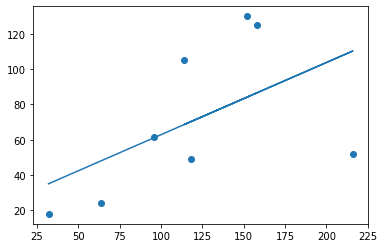

In [89]:
%matplotlib inline
plt.scatter(x,y)
plt.plot(A[:,0], A[:,0]*X[0]+X[1], '-')
plt.show()

# 7절. 유용한 팁
## 7.1 히스토그램: matplotlib의 hist()함수

In [90]:
mu, sigma = 2, 0.5
#정규분포 데이터 넘파이 배열 만들기(평균:mu, 표준편차: sigma)
v = np.random.normal(mu, sigma, 10000)

In [91]:
(n, bins) = np.histogram(v, bins=50, density=True)
len(n), len(bins)

(50, 51)

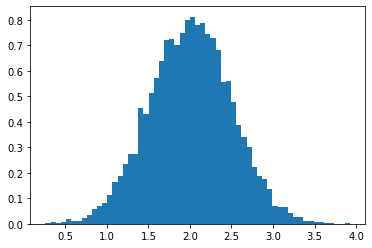

In [92]:
plt.hist(v, bins="auto", density=1)
plt.show()

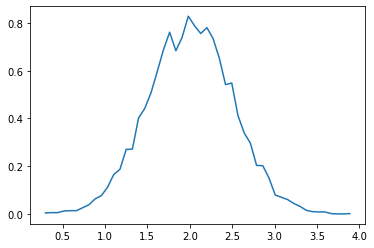

In [93]:
plt.plot((bins[:-1]+bins[1:])/2, n)
plt.show()

# 8절. 연습문제
## 8.1 실습형

In [94]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

In [95]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [98]:
#1. 각 변수별 평균을 출력하세요
np.mean(iris_data, axis=0) #열별 평균

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [99]:
#2. 처음 다섯개 행을 출력하세요
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [100]:
#3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력하세요
iris_data[:5, :-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [108]:
#4. 처음 다섯개 행에서 마지막 열만 출력하세요
iris_data[:5, -1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [104]:
#5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행 결과는 2번과 같아야 함
np.c_[iris_data[:5, :-1], iris_data[:5, -1]]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [105]:
np.column_stack((iris_data[:5, :-1], iris_data[:5, -1]))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [109]:
np.hstack((iris_data[:5, :-1], iris_data[:5, -1].reshape(-1,1)))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [110]:
np.hstack((iris_data[:5, :-1], iris_data[:5, -1][:,np.newaxis]))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [119]:
#6. 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력
np.mean(iris_data, axis=0) #전체 행의 열별 평균
iris_data[:5][iris_data[:5]>np.mean(iris_data, axis=0)]

array([3.5, 3.2, 3.1, 3.6])

In [118]:
mean_row_5 = np.mean(iris_data[0:5], axis=0) #처음 다섯개 행의 열별 평균
iris_data[:5][iris_data[:5]>mean_row_5]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

## 8.2 문제풀이형

In [120]:
#1. [12, 15, 18, 21]
a = np.arange(12).reshape(3,4)
print(a.sum(0)) #열별 합

[12 15 18 21]


In [121]:
#2. 차원을 바꿀 수 있는 방법 모두 고르기: a.resize()만 a의 차원 바꿈 (a.ravel(), a.reshape()은 차원을 바꿔서 리턴, a차원은 그대로)
#4번은 a.T 같은 경우 전치행렬 (a의 차원이 바뀌지는 않음, 숫자 넣을 수 없음)
a = np.floor(10*np.random.random((3,4)))
a

array([[4., 6., 9., 2.],
       [4., 3., 5., 6.],
       [7., 8., 6., 2.]])

In [122]:
a.shape

(3, 4)

In [123]:
a.ravel() # -> 1차원 배열로 풀어서 반환(a는 그대로)

array([4., 6., 9., 2., 4., 3., 5., 6., 7., 8., 6., 2.])

In [124]:
a.reshape(6,2) # -> 6행 2열 반환(a는 그대로)

array([[4., 6.],
       [9., 2.],
       [4., 3.],
       [5., 6.],
       [7., 8.],
       [6., 2.]])

In [125]:
a.resize((2,6))
a

array([[4., 6., 9., 2., 4., 3.],
       [5., 6., 7., 8., 6., 2.]])

In [127]:
a.T #a의 전치행렬 (a는 그대로)

array([[4., 5.],
       [6., 6.],
       [9., 7.],
       [2., 8.],
       [4., 6.],
       [3., 2.]])

In [128]:
#3. 1번
a = np.arange(12).reshape(3,4)
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [129]:
a[:,:2]

array([[0, 1],
       [4, 5],
       [8, 9]])

In [130]:
a[1,2], a[1][2]

(6, 6)

In [131]:
#4. [1,0,3,0,0]
a = np.array([1,2,3,4,5])
a[[1,3,4]]=0
a 

array([1, 0, 3, 0, 0])

In [132]:
#5. np.c_[a,b]
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [133]:
np.r_[a,b]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [134]:
np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [135]:
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[ 6,  7,  8,  9, 10]]))

In [136]:
[[a],[b]]

[[array([1, 2, 3, 4, 5])], [array([ 6,  7,  8,  9, 10])]]

In [137]:
np.dstack((a,b))

array([[[ 1,  6],
        [ 2,  7],
        [ 3,  8],
        [ 4,  9],
        [ 5, 10]]])

In [138]:
np.column_stack((a,b))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [139]:
np.stack((a,b), axis=1)

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [141]:
np.hstack((a[:,np.newaxis], b[:,np.newaxis]))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])